<a href="https://colab.research.google.com/github/baelanche/Deep_learning_introduction/blob/master/1.%EC%86%90%EA%B8%80%EC%94%A8%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EB%B6%84%EB%A5%98/RNN%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC_%EC%86%90%EA%B8%80%EC%94%A8_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN을 이용하여 손글씨 이미지 분류하기

## Preprocessing

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

## see mnist dataset

In [5]:
mnist = keras.datasets.mnist
((train_images, train_labels) , (test_images, test_labels)) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape
# Parameter (BHW)
# 1 : 데이터의 크기
# 2 : 이미지 height
# 3 : 이미지 width

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## plt를 이용한 이미지 출력

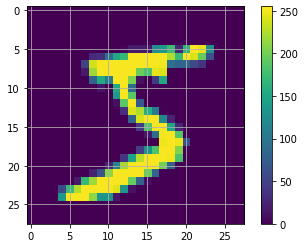

answer : 5


In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() # 우측의 색상바
plt.grid(True) # 격자
plt.show()
print(f"answer : {train_labels[0]}")

## 0이 아닌 값 출력하기

In [8]:
# train_images[0].reshape(-1) 1차원으로 변경됨
list(filter(lambda x: x != 0, train_images[0].reshape(-1)))[:10]

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]

## dtype 출력하기

In [9]:
print(train_images.dtype)
print(train_labels.dtype)
print(test_images.dtype)
print(test_labels.dtype)
# unsigned int 8bit

uint8
uint8
uint8
uint8


## 데이터 범위 확인

In [13]:
print(list(filter(lambda x: x != 0, train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x != 0, train_labels.reshape(-1)))[:10])
print(list(filter(lambda x: x != 0, test_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x != 0, test_labels.reshape(-1)))[:10])

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]
[5, 4, 1, 9, 2, 1, 3, 1, 4, 3]
[84, 185, 159, 151, 60, 36, 222, 254, 254, 254]
[7, 2, 1, 4, 1, 4, 9, 5, 9, 6]


## train/test 이미지 데이터의 최소/최대값을 출력

In [19]:
min(train_images.reshape(-1)), max(train_images.reshape(-1)), min(test_images.reshape(-1)), max(test_images.reshape(-1))

(0, 255, 0, 255)

## 정수형을 실수형으로 변경

In [27]:
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

## 데이터 0-1 노말라이즈 수행

In [28]:
# 현재 배열의 값 0-255 를 0-1 로 바꾸는 과정
train_images = train_images / 255
test_images = test_images / 255

## 값 확인

In [31]:
print(list(filter(lambda x: x != 0, train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x != 0, test_images[0].reshape(-1)))[:10])

[0.011764705882352941, 0.07058823529411765, 0.07058823529411765, 0.07058823529411765, 0.49411764705882355, 0.5333333333333333, 0.6862745098039216, 0.10196078431372549, 0.6509803921568628, 1.0]
[0.32941176470588235, 0.7254901960784313, 0.6235294117647059, 0.592156862745098, 0.23529411764705882, 0.1411764705882353, 0.8705882352941177, 0.996078431372549, 0.996078431372549, 0.996078431372549]


## 시각화
